In [8]:
!python val_extraction.py \
    --save_path evaluation \
    --model_type KPGrouping \
    --data_dir "./img/" \
    --cache_path "./cache/" \
    --trained_model_iter "best"

Preloading KPGrouping model
Loading KPGrouping model
Configuration file loading complete
Config loading complete
Loading parameters at iteration: best
Label file: None
Building neural network...
Import complete
Keypoint grouping enabled.
Initiating losses
Total parameters: 199641774
Loading parameters...
Loading model from ./cache/nnet\KPGrouping\KPGrouping_best.pkl
Predicting with KPGrouping net


c:\Users\admin\miniconda3\envs\pjt\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")

 25%|██▌       | 1/4 [00:01<00:04,  1.44s/it][ WARN:0@4.200] global loadsave.cpp:241 cv::findDecoder imread_('./img/images\val\새 폴더'): can't open/read file: check file path/integrity
[ WARN:0@4.200] global loadsave.cpp:241 cv::findDecoder imread_('./img/images\val\새 폴더 (2)'): can't open/read file: check file path/integrity
[ WARN:0@4.200] global loadsave.cpp:241 cv::findDecoder imread_('./img/images\val\새 폴더 (3)'): can't open/read file: check file path/integrity

100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


In [9]:
import json

with open("evaluation/KPGroupingbest.json", "r") as f:
  result = json.load(f)

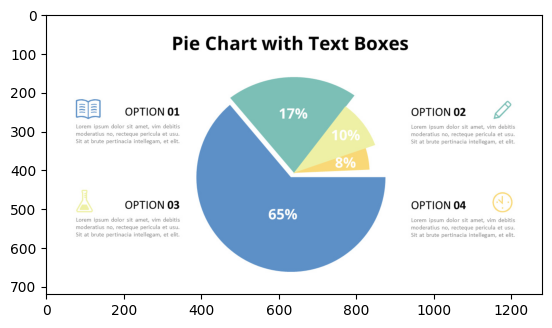

In [10]:
import matplotlib.pyplot as plt
import cv2

img1 = list(result.keys())[0]
img = cv2.imread('img/images/val/' + img1, cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)

plt.gray()
plt.imshow(img)

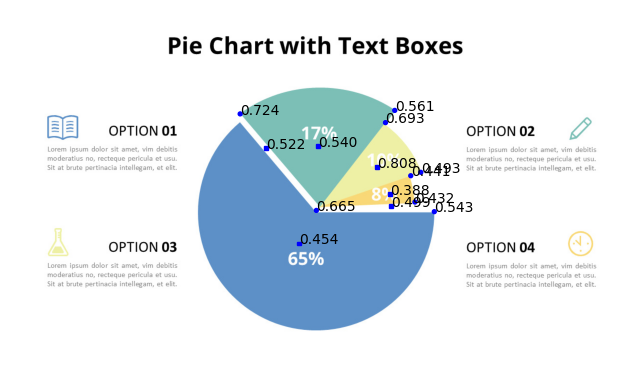

In [11]:
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
patches = []

fig, ax = plt.subplots(1, figsize=(8,8))
ax.set_axis_off()

patch_size = 4

for p in result[img1][0]['0']:
  if p[0] > 0.39:
    patches.append(Circle((p[2], p[3] ), radius=patch_size, color='red'))
    plt.text(p[2], p[3], f"{p[0]:.3f}")

for p in result[img1][1]['0']:
  if p[0] > 0.28:
    patches.append(Rectangle((p[2]-patch_size, p[3]-patch_size), patch_size*2,patch_size*2, color='blue'))
    plt.text(p[2], p[3], f"{p[0]:.3f}")

for p in result[img1][0]['1']:
  if p[0] > 0.39:
    patches.append(Circle((p[2], p[3] ), radius=patch_size, color='green'))
    plt.text(p[2], p[3], f"{p[0]:.3f}")

for p in result[img1][1]['1']:
  if p[0] > 0.28:
    patches.append(Rectangle((p[2]-patch_size, p[3]-patch_size), patch_size*2,patch_size*2, color='green'))
    plt.text(p[2], p[3], f"{p[0]:.3f}")

for p in result[img1][0]['2']:
  if p[0] > 0.39:
    patches.append(Circle((p[2], p[3] ), radius=patch_size, color='blue'))
    plt.text(p[2], p[3], f"{p[0]:.3f}")

for p in result[img1][1]['2']:
  if p[0] > 0.28:
    patches.append(Rectangle((p[2]-patch_size, p[3]-patch_size), patch_size*2,patch_size*2, color='blue'))
    plt.text(p[2], p[3], f"{p[0]:.3f}")

for p in patches:
    ax.add_patch(p)

ax.imshow(img)


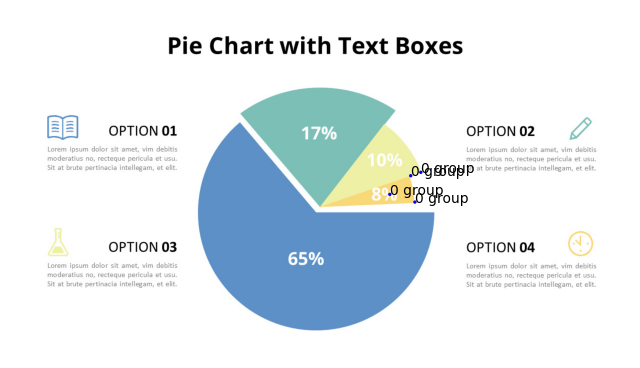

In [18]:
patches = []

fig, ax = plt.subplots(1, figsize=(8,8))
ax.set_axis_off()


for n, p in enumerate(result[img1][2][4:5]):
  for i in range((len(p) - 2) //2):
    if p[-2] > 0. and p[-1] == 0:
      if i == 0:
        plt.text(p[2*i] + 10, p[(2*i)+1] - 15, f"{p[-2]:.3f}")
      patches.append(Circle((p[2*i], p[(2*i)+1] ), radius=2, color='red'))
      plt.text(p[2*i], p[(2*i)+1], f"{n} group")

    elif p[-2] > 0. and p[-1] == 1:
      patches.append(Circle((p[2*i], p[(2*i)+1] ), radius=2, color='green'))
      plt.text(p[2*i], p[(2*i)+1], f"{n} group")

    elif p[-2] > 0. and p[-1] == 2:
      patches.append(Circle((p[2*i], p[(2*i)+1] ), radius=2, color='blue'))
      plt.text(p[2*i], p[(2*i)+1], f"{n} group")


for p in patches:
    ax.add_patch(p)


ax.imshow(img)

c:\Users\admin\miniconda3\envs\pjt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-15 20:13:11 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2024-06-15 20:13:18 | WARNING | easyocr.easyocr | Using CPU. Note: This module is much faster with a GPU.


IndexError: list index out of range

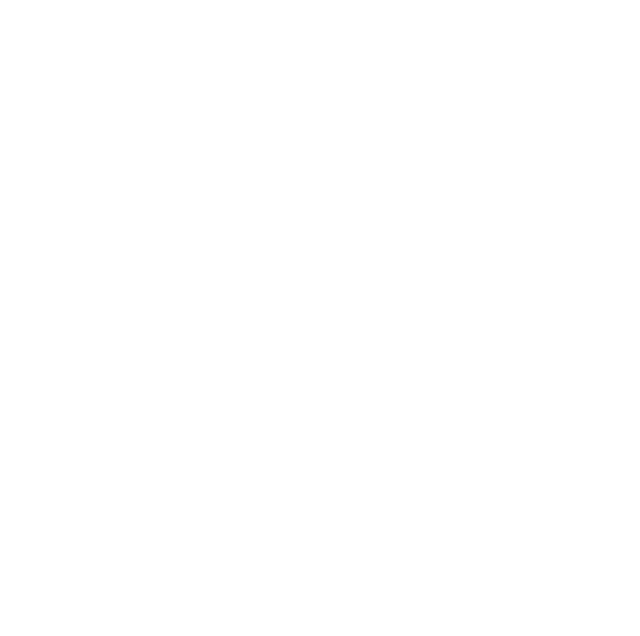

In [6]:
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
import numpy as np
from pie import pie_relocation

patches = []

fig, ax = plt.subplots(1, figsize=(8,8))
ax.set_axis_off()

line_colors= ['red','blue','green', 'orange']

if result[img1][2][-1] == 2:
    result[img1][2] = pie_relocation(result[img1][2])

for n, p in enumerate(result[img1][2]):
    
    poly_point = []
    
    if p[-2] > 0. and p[-1] == 0:
        #좌상, 우하 확인
        if p[4] > p[2]:
            tl = (p[2],p[3])
            br = (p[4],p[5])
        else:
            tl = (p[4],p[5])
            br = (p[2],p[3])
        
        poly_point.append(tl)
        poly_point.append((br[0],tl[1]))
        poly_point.append(br)
        poly_point.append((tl[0],br[1]))
        
        patches.append(Rectangle((p[0]-patch_size, p[1]-patch_size), patch_size*2,patch_size*2, color='blue'))
        patches.append(Polygon(poly_point, fill=None ,edgecolor='red',ls='solid',lw=1))
        plt.text(p[0], p[1], f"{n}")
        
    elif p[-2] > 0. and p[-1] == 1:

        # (xlist, ylist) 형태로 변환
        line_points = np.array((p[2:-2:2],p[3:-2:2]))
        # 각요소 (x,y)로 묶음
        line_points = line_points.T
        # x 값 기준으로 정렬
        line_points = sorted(line_points,key=lambda x:x[0])
        line_points = np.array(line_points)
        # (xlist, ylist) 형태로 변환
        
        for i in line_points.T:
            poly_point.append(i)

        color = line_colors.pop()
        for i in line_points:
            patches.append(Circle(i,color=color,radius=4))
        
        patches.append(Line2D(poly_point[0],poly_point[1],color=color,ls='solid',lw=3))
        
        plt.text(p[0], p[1], f"{n}")
    elif p[-2] > 0. and p[-1] == 2:
        
        # 벡터의 내각 계산
        theta = np.arccos(np.dot((p[2]- p[6],p[3]-p[7]), (p[4]- p[6],p[5]-p[7]))/ (np.linalg.norm((p[2]- p[6],p[3]-p[7]))*np.linalg.norm((p[4]- p[6],p[5]-p[7]))))
        # 벡터 시계 방향 확인 
        is_clock = np.cross((p[2]- p[6],p[3]-p[7]), (p[4]- p[6],p[5]-p[7]))
        is_clock = is_clock/abs(is_clock)
        
        theta = theta * is_clock
        
        # 절반 회전 했을때 벡터
        check_p = ((p[2] - p[6]) * np.cos(theta *0.5) - (p[3] - p[7]) * np.sin(theta *0.5) + p[6],
                (p[2]- p[6]) * np.sin(theta *0.5) + (p[3] - p[7]) * np.cos(theta *0.5) + p[7])
        
        # 절반 회전 했을때 벡터 와 부채꼴 중심점 벡터 방향 확인
        chkeck_clock = np.dot((check_p[0]- p[6],check_p[1]-p[7]), (p[0]- p[6],p[1]-p[7])) / (np.linalg.norm((check_p[0]- p[6],check_p[1]-p[7])) * np.linalg.norm((p[0]- p[6],p[1]-p[7])))
        
        # 180도가 넘는 부채꼴
        if chkeck_clock < 0:
            theta = (2*np.pi - abs(theta)) * -theta / abs(theta)
            
        poly_point.append((p[6],p[7]))
        poly_point.append((p[2],p[3]))
        
        for i in range(1,101):
            poly_point.append(((p[2] - p[6]) * np.cos(theta * i / 100) - (p[3] - p[7]) * np.sin(theta * i / 100) + p[6],
            (p[2]- p[6]) * np.sin(theta * i / 100) + (p[3] - p[7]) * np.cos(theta * i / 100) + p[7]))

        patches.append(Rectangle((p[0]-patch_size, p[1]-patch_size), patch_size*2,patch_size*2, color='blue'))
        patches.append(Polygon(poly_point, fill=None ,edgecolor='blue',ls='solid',lw=2))
        plt.text(p[0], p[1], f"{n}")
        

for patch in patches:
    ax.add_artist(patch)


ax.imshow(img)

In [73]:
result[img1][2][0]

[417.8682556152344,
 553.2844848632812,
 290.0548095703125,
 639.326171875,
 549.5646362304688,
 638.9679565429688,
 417.7371826171875,
 379.3997497558594,
 0.41632261872291565,
 2]